## Importing Libraries and Loading the Dataset

In [713]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [714]:
#loading the dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/Archanajs2001/Supply-Chain-Management/main/supply_train.csv', index_col=0)
test_data = pd.read_csv('https://raw.githubusercontent.com/Archanajs2001/Supply-Chain-Management/main/supply_test.csv', index_col=0)

## Data Preprocessing

In [715]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [716]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [717]:
#descrptive stats
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,16620.0,4.126655,2.606241,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,16620.0,0.780927,1.206351,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,16620.0,3.103129,1.147711,0.0,2.0,3.0,4.0,12.0
retail_shop_num,16620.0,4983.904994,1051.032239,1821.0,4309.0,4856.0,5500.0,11008.0
distributor_num,16620.0,42.473706,16.090000,15.0,29.0,42.0,56.0,70.0
flood_impacted,16620.0,0.096871,0.295791,0.0,0.0,0.0,0.0,1.0
flood_proof,16620.0,0.056017,0.229961,0.0,0.0,0.0,0.0,1.0
electric_supply,16620.0,0.655716,0.475149,0.0,0.0,1.0,1.0,1.0
dist_from_hub,16620.0,163.521901,62.701193,55.0,109.0,164.0,218.0,271.0
workers_num,15953.0,28.911490,7.842046,10.0,24.0,28.0,33.0,98.0


In [718]:
train_data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [719]:
#looking for duplicates
#no duplicates present

train_data.duplicated().sum()

0

In [720]:
#looking for null values
#null values present in 3 columns

train_data.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [721]:
#looking for null values
#null values present in 2 columns

test_data.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

<Axes: >

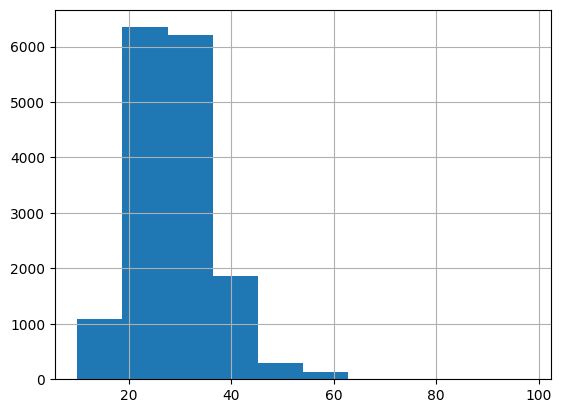

In [722]:
train_data['workers_num'].hist()

In [723]:
#replacing null values with median

train_data['workers_num'] = train_data['workers_num'].fillna(train_data['workers_num'].median())

test_data['workers_num'] = test_data['workers_num'].fillna(test_data['workers_num'].median())


In [724]:
train_data['wh_est_year'].isnull().sum()
#7860/16620 are missing which is almost half

7860

In [725]:
train_data.shape

(16620, 24)

<Axes: xlabel='wh_est_year', ylabel='product_wg_ton'>

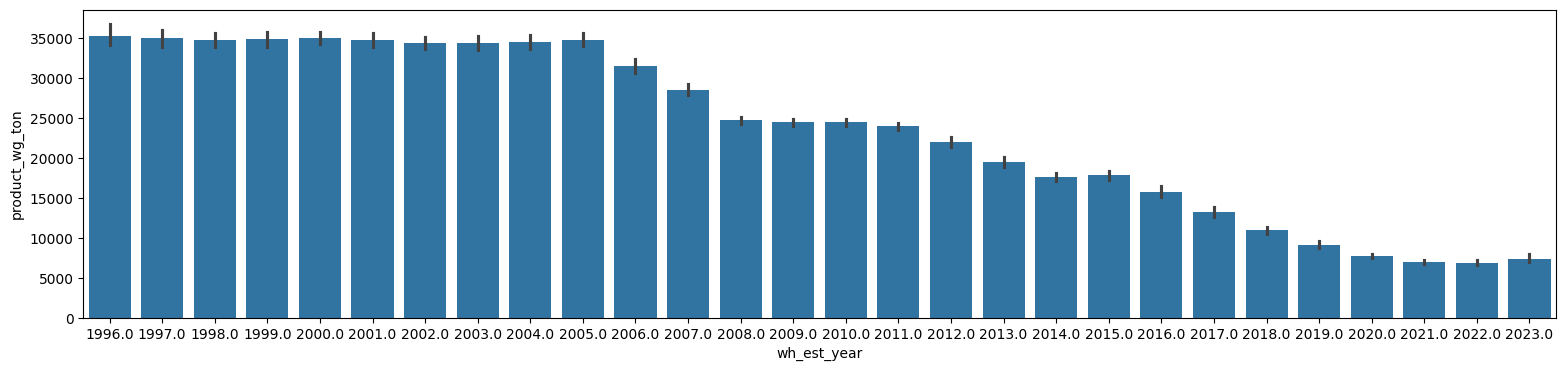

In [726]:
#visualizing to understand relationship with target variable
#it does show negative correlation
plt.figure(figsize=(19,4))
sns.barplot(train_data,x='wh_est_year',y='product_wg_ton')

In [727]:
train_data['wh_est_year'].head(30)

0        NaN
1        NaN
2        NaN
3        NaN
4     2009.0
5     2009.0
6     2010.0
7        NaN
8     2013.0
9        NaN
10    1999.0
11    2017.0
12    2022.0
13    2008.0
14       NaN
15       NaN
16       NaN
17       NaN
18    2001.0
19       NaN
20    2016.0
21    2010.0
22    1997.0
23    2003.0
24       NaN
25    2006.0
26       NaN
27       NaN
28       NaN
29    2019.0
Name: wh_est_year, dtype: float64

In [728]:
#replacing null values with mode

train_data['wh_est_year'] = train_data['wh_est_year'].fillna(train_data['wh_est_year'].mode().iloc[0])

test_data['wh_est_year'] = test_data['wh_est_year'].fillna(test_data['wh_est_year'].mode().iloc[0])

In [729]:
train_data.isnull().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    599
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

<Axes: >

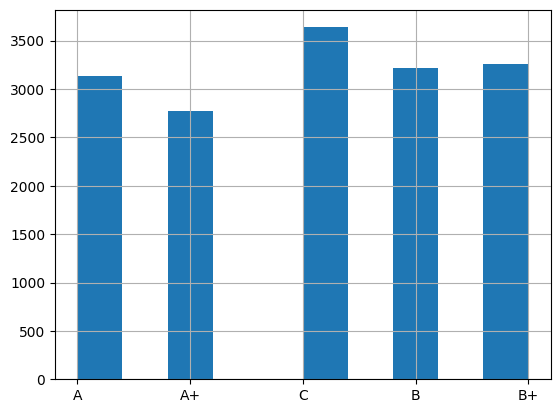

In [730]:
#distribution plot
#didnt find any huge variance in the distribution

train_data['approved_wh_govt_certificate'].hist()

In [731]:
#replacing null values with mode

train_data['approved_wh_govt_certificate'] = train_data['approved_wh_govt_certificate'].fillna(train_data['approved_wh_govt_certificate'].mode().iloc[0])
test_data['approved_wh_govt_certificate'] = test_data['approved_wh_govt_certificate'].fillna(test_data['approved_wh_govt_certificate'].mode().iloc[0])


In [732]:
#making sure all null values were handled

train_data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [733]:
#making sure all null values were handled

test_data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [734]:
#dropping the 2 ID features since it isnt relevant for deciciding product weight

drop_cols = ['Ware_house_ID', 'WH_Manager_ID']

train_data.drop(columns=drop_cols, inplace=True)
test_data.drop(columns=drop_cols, inplace=True)



In [735]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  object 
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

## Exploratory Data Analysis

<ipython-input-736-9b1c72cf514e>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.drop('product_wg_ton', axis=1).corrwith(train_data.product_wg_ton).plot(kind='bar', grid=True, figsize=(10, 5),


<Axes: title={'center': 'Correlation with target'}>

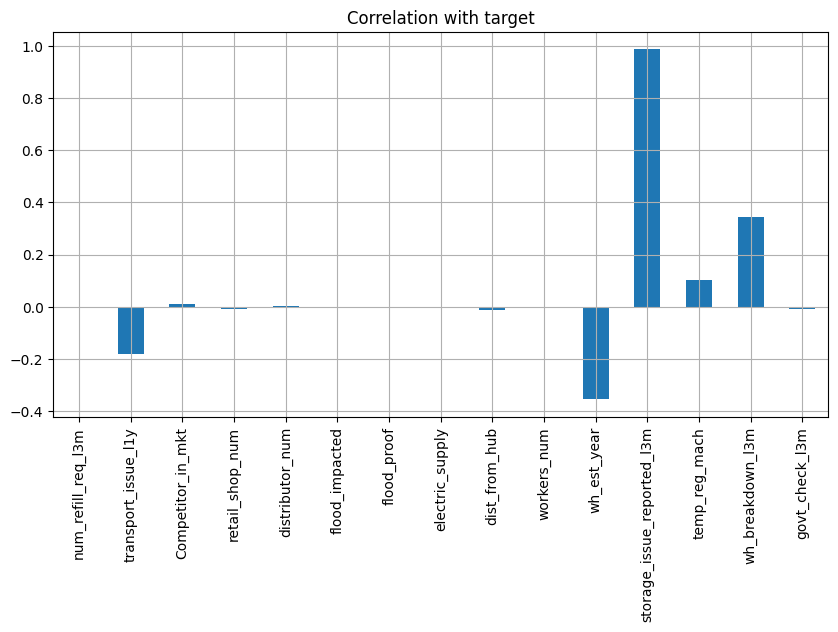

In [736]:
#bar plot depicting the correlation coefficients between the target variable and other numerical variables

train_data.drop('product_wg_ton', axis=1).corrwith(train_data.product_wg_ton).plot(kind='bar', grid=True, figsize=(10, 5),
                                                   title="Correlation with target")

# from the graph we can conclude that storage_issue_reported_l3m, temp_reg_mach  and wh_breakdown_l3m are positively correlated to the target variable
# while transport issues in last one year and Warehouse established year are negatively correlated to the target variable

# only the relation with numerical variables are shown in this graph.
# after label encoding another correlation chart can be made with all feature varibales

<ipython-input-737-711504207cc6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='magma')


<Axes: >

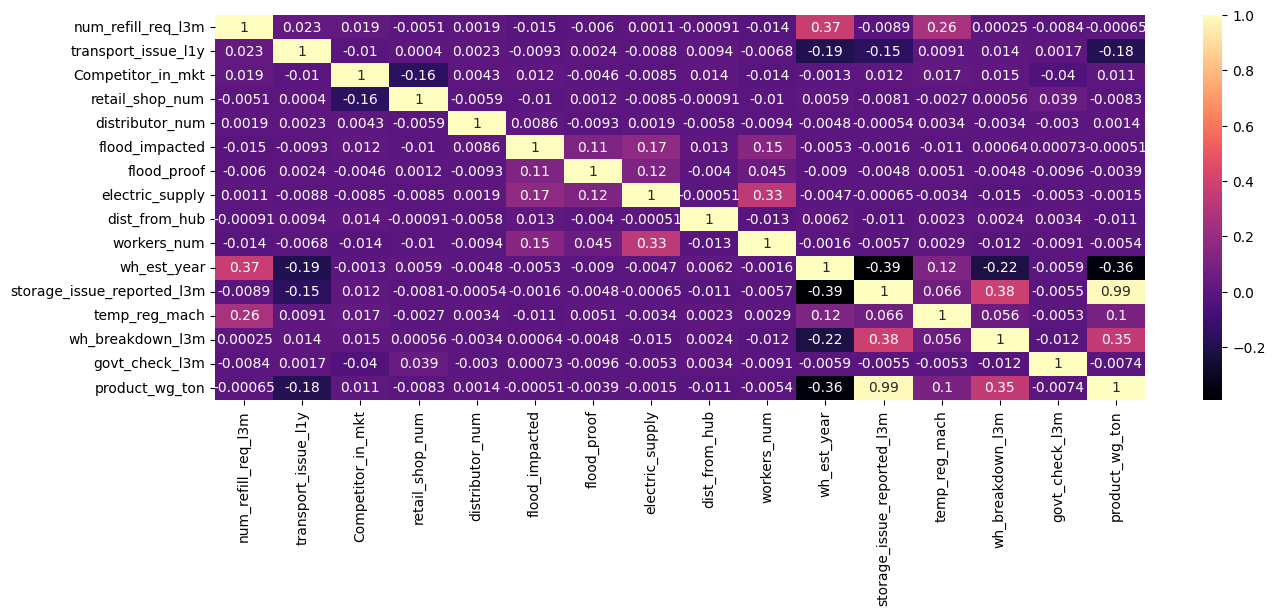

In [737]:
#heatmap showcasing correlation data of all numerical variables with other numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(train_data.corr(), annot=True, cmap='magma')

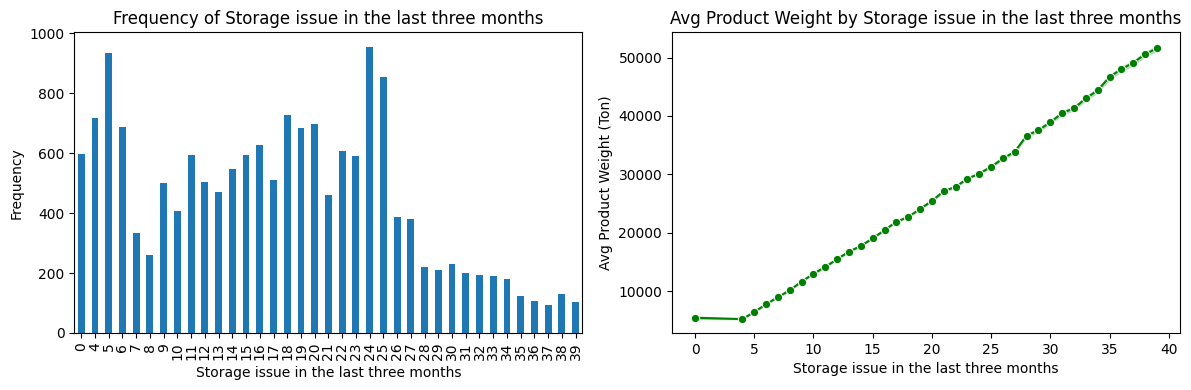

In [738]:
#line plot visualising the Frequency of Storage issue in the last three months and variation in product weight according to storage issues reported in the last 3 months

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['storage_issue_reported_l3m'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Storage issue in the last three months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Storage issue in the last three months')

# Plotting the second bar chart
sns.lineplot(data=train_data, x='storage_issue_reported_l3m', y='product_wg_ton', color='green', marker='o')
axes[1].set_xlabel('Storage issue in the last three months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Storage issue in the last three months')

plt.tight_layout()
plt.show()

#variables are highly correlated showing almost a linear relationship
#with the increase in product weight, storage issues are also increasing

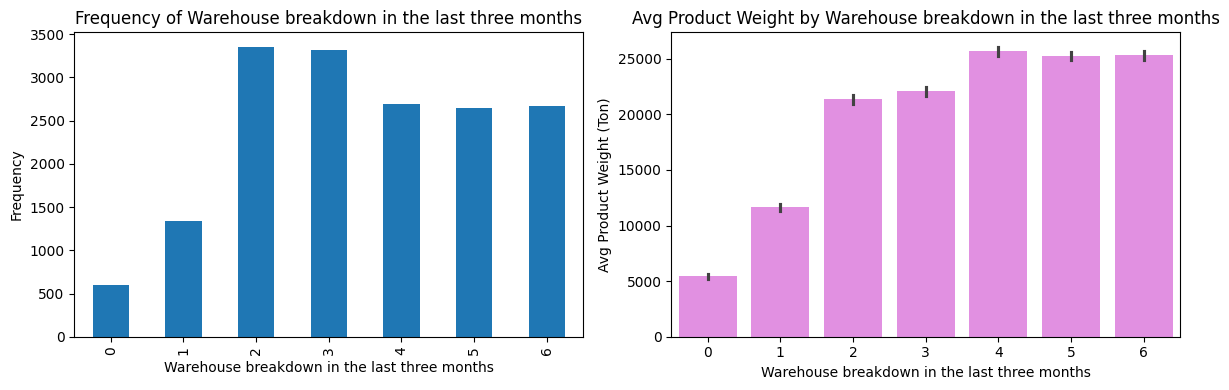

In [739]:
#bar plot visualising the Frequency of Warehouse breakdown in the last three months and variation in product weight according to No. of times the warehouse faces the breakdown in the last 3 months

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['wh_breakdown_l3m'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse breakdown in the last three months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse breakdown in the last three months')

# Plotting the second bar chart
sns.barplot(data=train_data, x='wh_breakdown_l3m', y='product_wg_ton', color='violet')
axes[1].set_xlabel('Warehouse breakdown in the last three months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse breakdown in the last three months')

plt.tight_layout()
plt.show()


#variables depict a positive correlation
#as the product weight increases, no of times the warehouse faces breakdown also shown to have increased

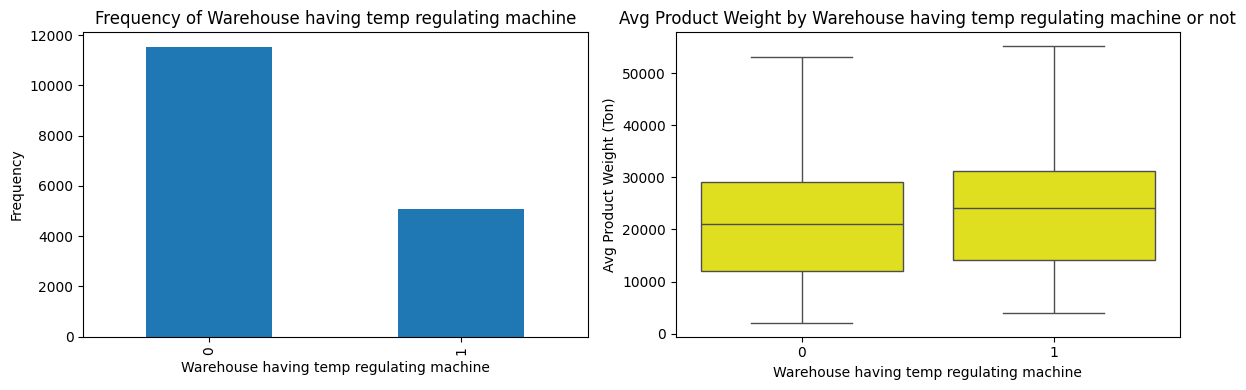

In [740]:
#box plot visualising the Frequency of Warehouse having temp regulating machine variation in product weight according to the warehouse having temperature regulating machine indicator or not

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['temp_reg_mach'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse having temp regulating machine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse having temp regulating machine')

# Plotting the second bar chart
sns.boxplot(data=train_data, x='temp_reg_mach', y='product_wg_ton', color='yellow')
axes[1].set_xlabel('Warehouse having temp regulating machine')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse having temp regulating machine or not')

plt.tight_layout()
plt.show()

#majority of warehouses doesnt have temperature regulating machine
#with the chances of warehouse having temperature regulator increases, product weight also increases

<ipython-input-741-638f597f8e41>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(order, rotation=90)


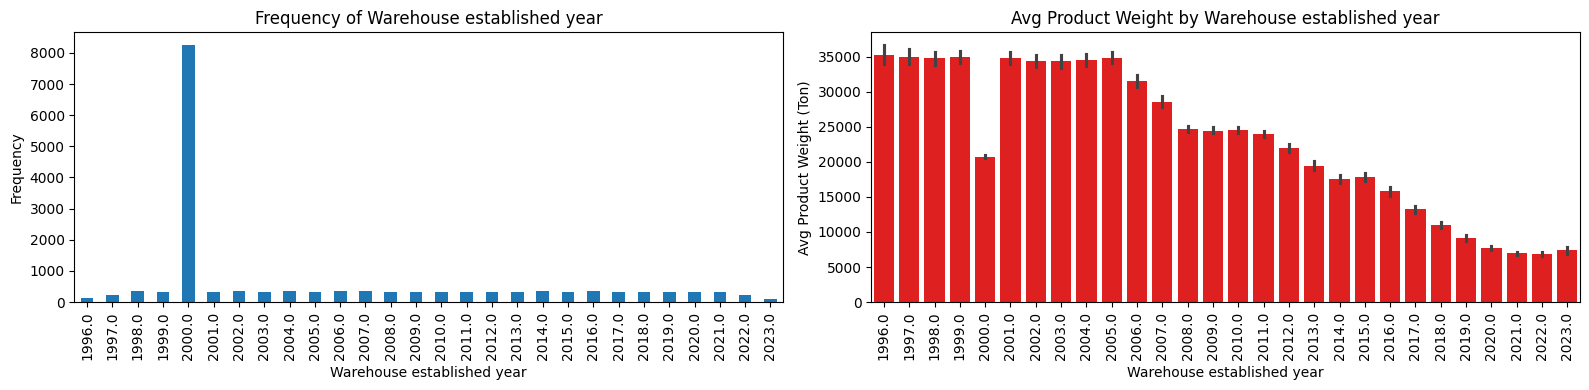

In [741]:
#bar chart showing Frequecy of Warehouse established year and Average Product Weight by Warehouse established year

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plotting the first bar chart
train_data['wh_est_year'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse established year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse established year')

# Plotting the second bar chart
order = train_data['wh_est_year'].unique()
order.sort()
sns.barplot(data=train_data, x='wh_est_year', y='product_wg_ton', color='red', order=order)
axes[1].set_xlabel('Warehouse established year')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse established year')
axes[1].set_xticklabels(order, rotation=90)

plt.tight_layout()
plt.show()


#Second chart shows that as the Warehouse established year increases, product weight decreases meaning that recently established warehouses are shown to have less product weight
#we can conclude that this feature variable has correlation with the target variable

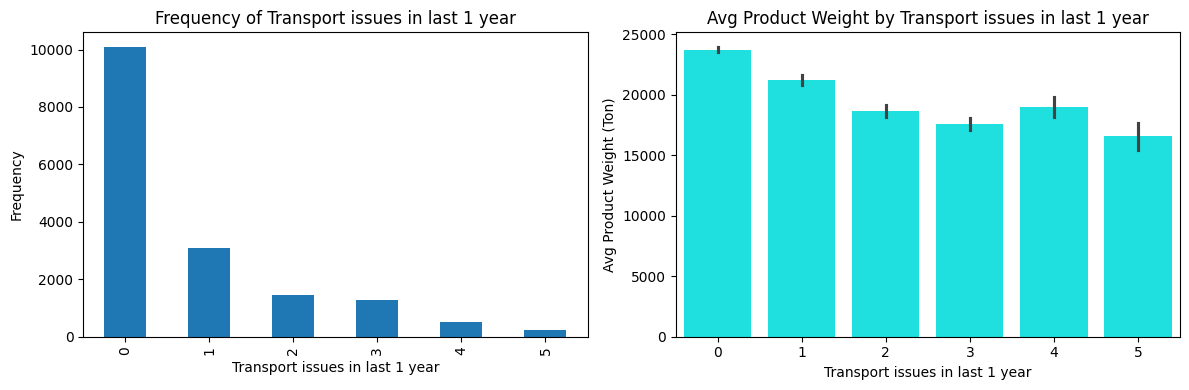

In [742]:
#bar chart showing Frequecy of Transport issues in last 1 year and Average Product Weight by Transport issues in last 1 year

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['transport_issue_l1y'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Transport issues in last 1 year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Transport issues in last 1 year')

# Plotting the second bar chart
order = train_data['transport_issue_l1y'].unique()
order.sort()
sns.barplot(data=train_data, x='transport_issue_l1y', y='product_wg_ton', color='cyan', order=order)
axes[1].set_xlabel('Transport issues in last 1 year')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Transport issues in last 1 year')

plt.tight_layout()
plt.show()

#First chart shows that majority of warehouses didnt face any transport issues in last one year
#Second chart shows that as the transport issues decreases, product weight increases meaning that warehouses with less transport issues have high product weight
#we can conclude that this feature variable has correlation with the target variable

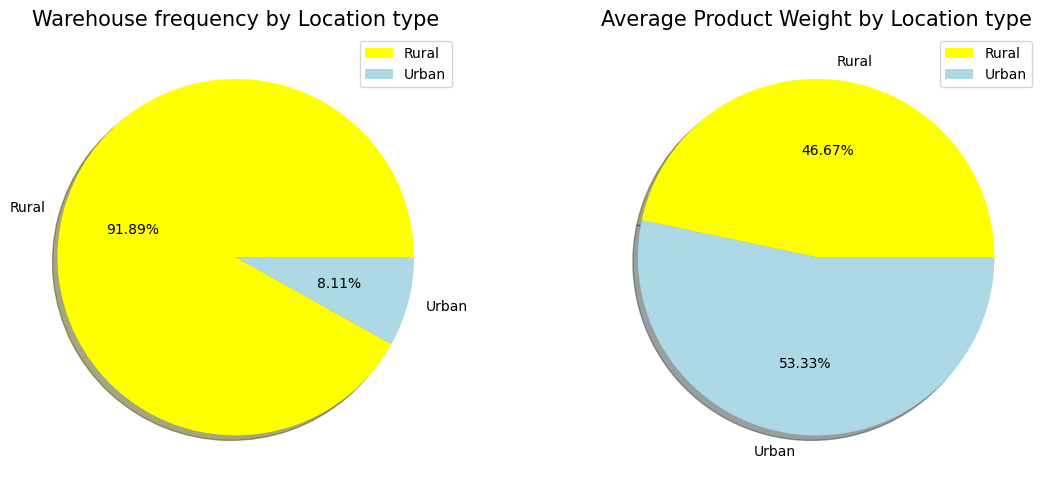

In [743]:
#pie chart showing Frequecy by Location type and Average Product Weight by Location type
labels= ['Rural', 'Urban']
size_total = train_data['Location_type'].value_counts().tolist()
colors = ['yellow', 'lightblue']
size_mean = train_data.groupby('Location_type')['product_wg_ton'].mean().to_list()

#Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Pie chart for frequency
axes[0].pie(size_total, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
axes[0].set_title('Warehouse frequency by Location type', fontsize=15)
axes[0].axis('off')
axes[0].legend()

#Pie chart for average product weight
axes[1].pie(size_mean, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
axes[1].set_title('Average Product Weight by Location type', fontsize=15)
axes[1].axis('off')
axes[1].legend()

plt.tight_layout()
plt.show()

#First chart shows that warehouses in Rural areas contribute to majority of the production as most of the warehouses are from there
#Second chart shows that warehouses in Urban areas have higher product weight meaning both variables have a small correlation

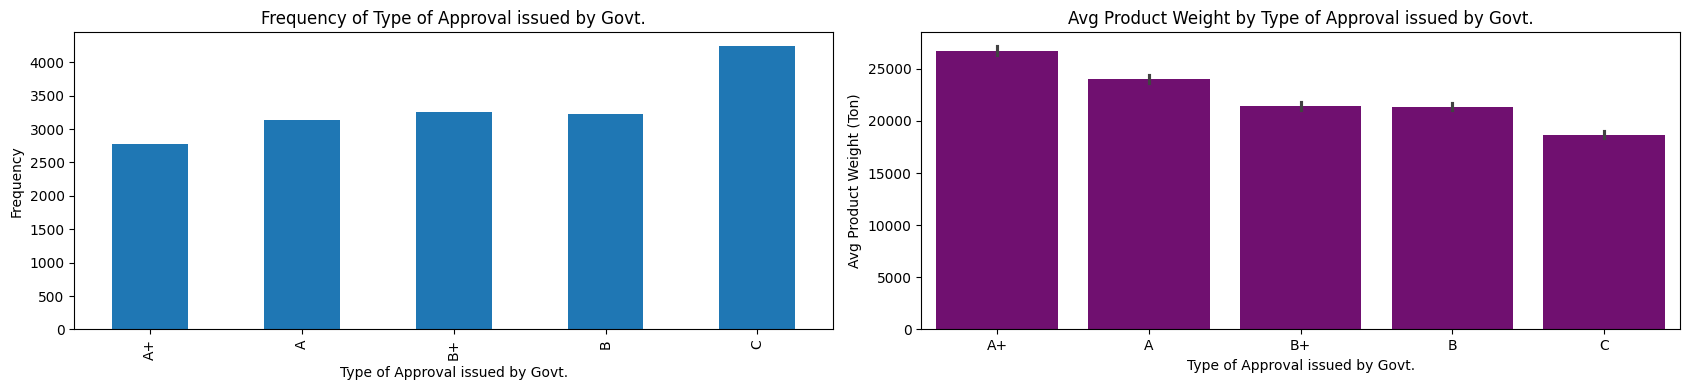

In [744]:
#bar chart showing Frequecy of Type of Approval issued by Govt. and Average Product Weight by Type of Approval issued by Govt.

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 4))

order = ['A+', 'A', 'B+', 'B', 'C']

# Plotting the first bar chart
train_data['approved_wh_govt_certificate'].value_counts().sort_index().reindex(order).plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Type of Approval issued by Govt.')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Type of Approval issued by Govt.')

# Plotting the second bar chart

sns.barplot(data=train_data, x='approved_wh_govt_certificate', y='product_wg_ton', color='purple', order=order)
axes[1].set_xlabel('Type of Approval issued by Govt.')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Type of Approval issued by Govt.')

plt.tight_layout()
plt.show()

# Second chart shows that warehouses with highest approval issued by govt. had the highest product weight, meaning that both variables are correlated.

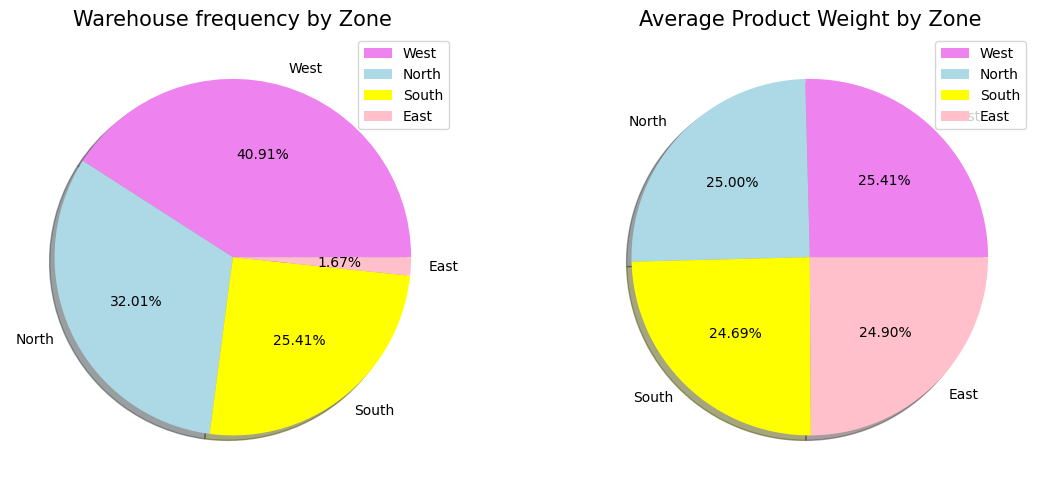

In [745]:
#pie chart showing Frequecy by Zone and Average Product Weight by Zone

labels= train_data['zone'].unique().tolist()
size_total = train_data['zone'].value_counts().tolist()
colors= ['violet', 'lightblue', 'yellow', 'pink']
size_mean = train_data.groupby('zone')['product_wg_ton'].mean().tolist()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for frequency
axes[0].pie(size_total, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
axes[0].set_title('Warehouse frequency by Zone', fontsize=15)
axes[0].axis('off')
axes[0].legend()

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
axes[1].set_title('Average Product Weight by Zone', fontsize=15)
axes[1].axis('off')
axes[1].legend()

plt.tight_layout()
plt.show()

#First chart shows North Zone has the highest production while East zone has the lowest production
#Second chart shows that there is not much change in product weight according to the zone meaning that the variables arent correlated

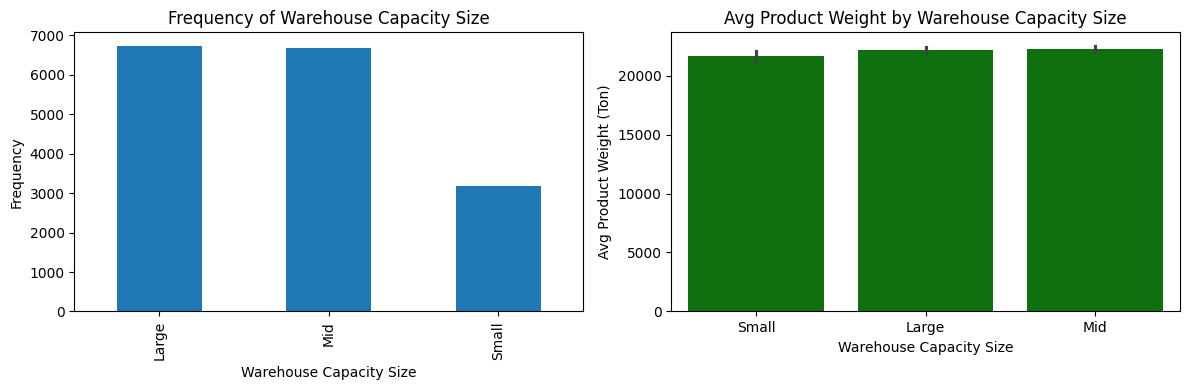

In [746]:
#bar chart showing Frequecy of Warehouse Capacity and Average Product Weight by Warehouse Capacity Size

#Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['WH_capacity_size'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse Capacity Size')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse Capacity Size')

# Plotting the second bar chart
sns.barplot(data=train_data, x='WH_capacity_size', y='product_wg_ton', color='green')
axes[1].set_xlabel('Warehouse Capacity Size')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse Capacity Size')

plt.tight_layout()
plt.show()

#First chart shows that majority of warehouses are in Large and Medium size
#Second chart shows that there is not much change in product weight according to the size of Warehouse meaning that the variables arent correlated

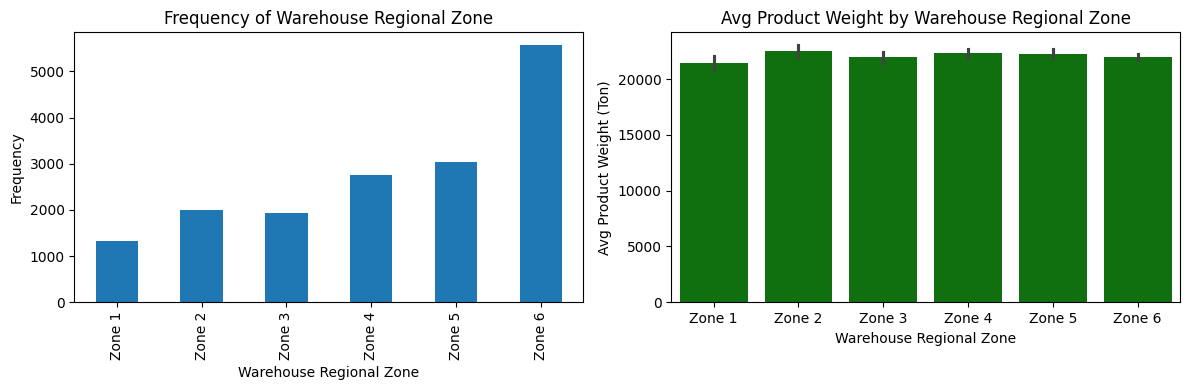

In [747]:
#bar chart showing Frequecy of Regional Zone and Average Product Weight by Regional Zone

#Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['WH_regional_zone'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse Regional Zone')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse Regional Zone')

# Plotting the second bar chart
order = train_data['WH_regional_zone'].unique()
order.sort()
sns.barplot(data=train_data, x='WH_regional_zone', y='product_wg_ton', color='green', order=order)
axes[1].set_xlabel('Warehouse Regional Zone')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse Regional Zone')

plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()

#First chart shows that Regional zone 6 has high no. of warehouses
#Second chart shows that there is not much change in product weight according its Regional Zone meaning that the variables arent correlated

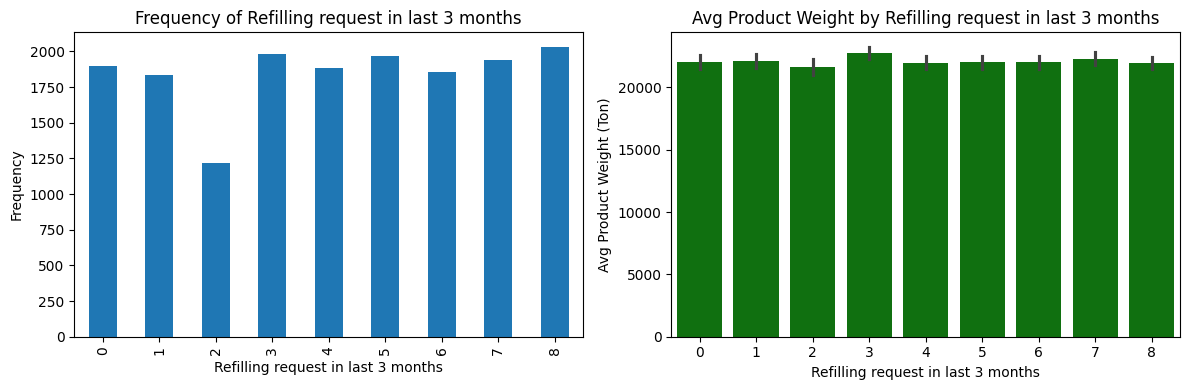

In [748]:
#bar chart showing Frequecy of Refilling request in last 3 months and Average Product Weight by Refilling request in last 3 months

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['num_refill_req_l3m'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Refilling request in last 3 months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Refilling request in last 3 months')

# Plotting the second bar chart
order = train_data['num_refill_req_l3m'].unique()
order.sort()
sns.barplot(data=train_data, x='num_refill_req_l3m', y='product_wg_ton', color='green', order=order)
axes[1].set_xlabel('Refilling request in last 3 months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Refilling request in last 3 months')

plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()

#First chart shows that frequency of no of refilling requests are evenly distribruted except 2
#Second chart shows that there is not much change in product weight according the refilling requests made by warehouses meaning that the variables arent correlated

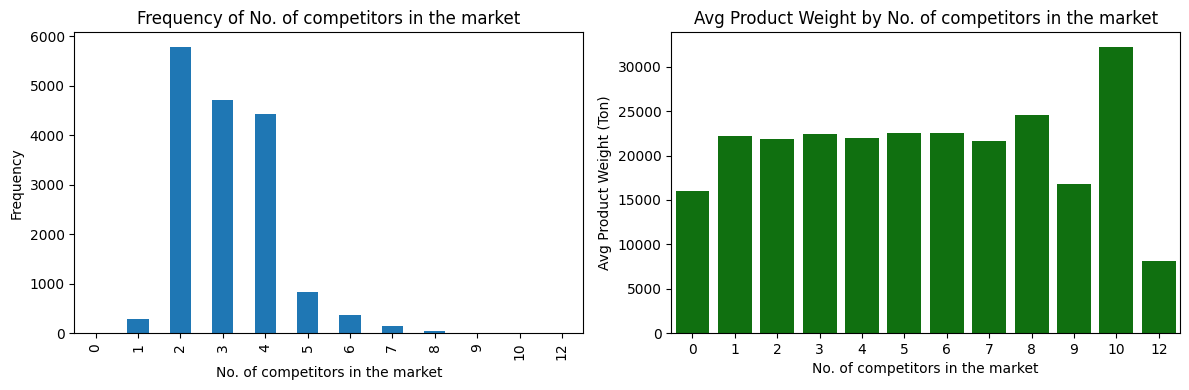

In [749]:
#bar chart showing Frequecy of No. of competitors in the market and Average Product Weight by No. of competitors in the market

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['Competitor_in_mkt'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('No. of competitors in the market')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of No. of competitors in the market')

# Plotting the second bar chart
order = train_data['Competitor_in_mkt'].unique()
order.sort()
sns.barplot(data=train_data, x='Competitor_in_mkt', y='product_wg_ton', color='green', errorbar= None, order=order)
axes[1].set_xlabel('No. of competitors in the market')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by No. of competitors in the market')

plt.tight_layout()
plt.show()

#First chart shows that majority of warehouses had either 2,3 or 4 competitors in the market
#Second chart shows that as warehouse having 10 no.of competitors had the highest product weight while 12 had the lowest
#feature variable isnt that correlated with the target variable

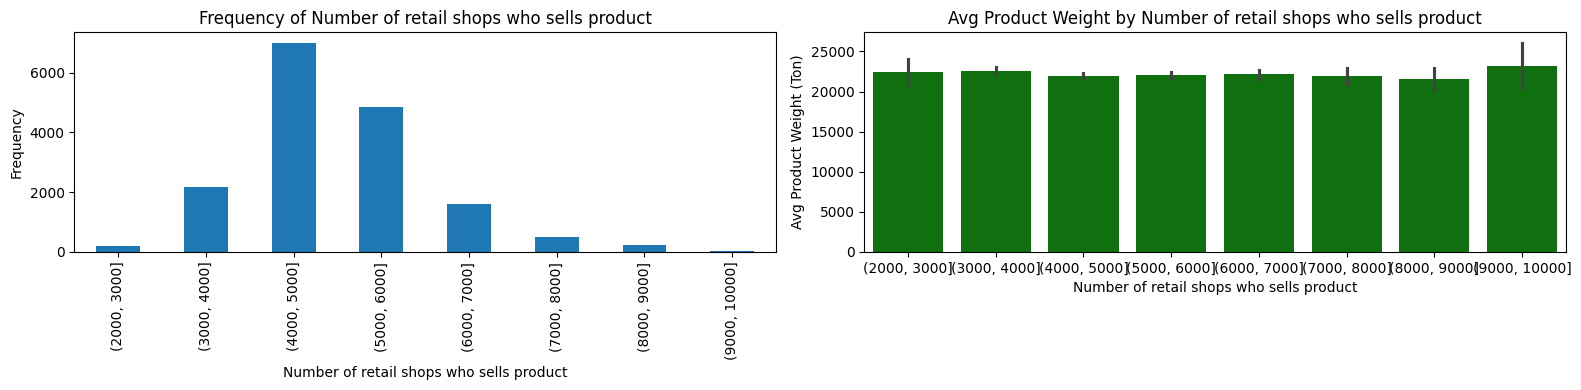

In [750]:
#bar chart showing Frequecy of Number of retail shops who sells product and Average Product Weight by Number of retail shops who sells product

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plotting the first bar chart
bins = [2000,3000, 4000 ,5000, 6000, 7000, 8000, 9000, 10000]  # Adjust the bin edges as per your data

# Created bins using pd.cut
train_data['binned_retail_shop'] = pd.cut(train_data['retail_shop_num'], bins=bins)

# Plotting the histogram-like bar plot
train_data['binned_retail_shop'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Number of retail shops who sells product')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Number of retail shops who sells product')

# Plotting the second bar chart
sns.barplot(data=train_data, x='binned_retail_shop', y='product_wg_ton', color='green', ax=axes[1])
axes[1].set_xlabel('Number of retail shops who sells product')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Number of retail shops who sells product')

plt.tight_layout()
plt.show()

#First chart shows that majority of warehouses had 3000 to 6000 Number of retail shops who sells product
#Second chart shows that there is not much change in product weight according to the Number of retail shops who sells product meaning that the variables arent correlated

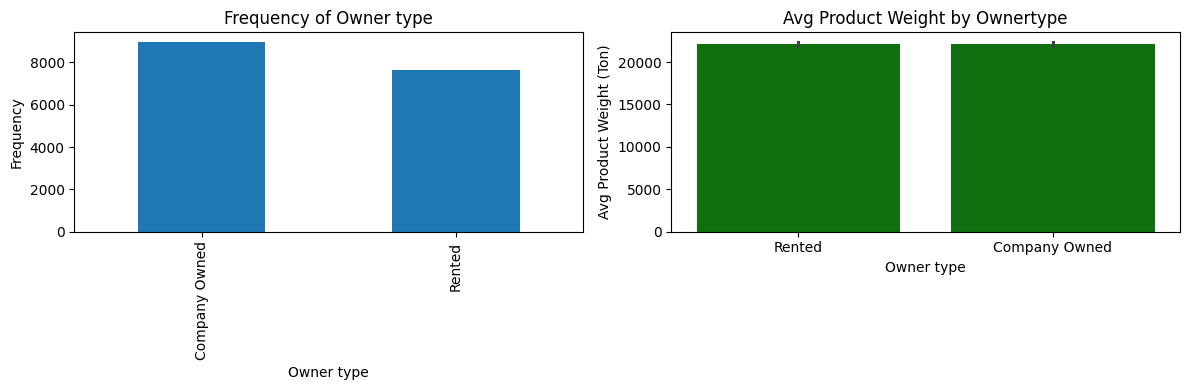

In [751]:
#bar chart showing Frequecy of Owner type in the market and Average Product Weight by Owner type
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the first bar chart
train_data['wh_owner_type'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Owner type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Owner type')

# Plotting the second bar chart
sns.barplot(data=train_data, x='wh_owner_type', y='product_wg_ton', color='green')
axes[1].set_xlabel('Owner type')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Ownertype')

plt.tight_layout()
plt.show()

#First chart shows that company owned warehouses are more in number than rented
#Second chart shows that there is not much change in product weight according to the Owner type meaning that the variables arent correlated

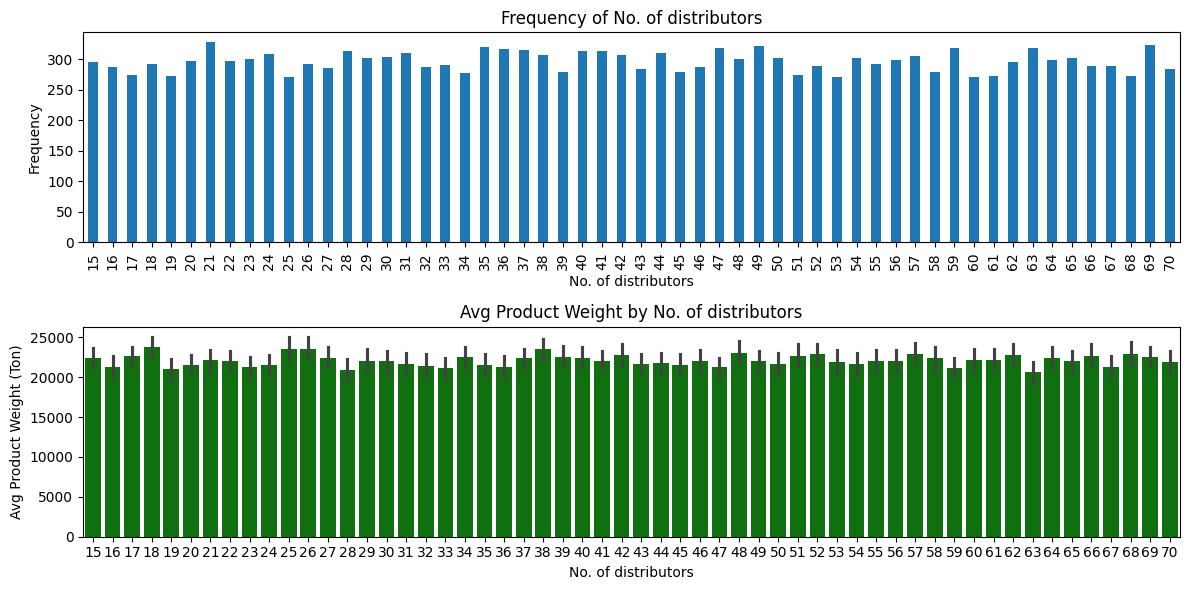

In [752]:
# bar chart showing Frequecy of No. of distributers and Average Product Weight by No. of distributers

# Set up subplots
fig, axes = plt.subplots(2,1, figsize=(12, 6))

# Plotting the first bar chart
train_data['distributor_num'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('No. of distributors')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of No. of distributors')

# Plotting the second bar chart
order = train_data['distributor_num'].unique()
order.sort()
sns.barplot(data=train_data, x='distributor_num', y='product_wg_ton', color='green', order=order)
axes[1].set_xlabel('No. of distributors')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by No. of distributors')

plt.tight_layout()
plt.show()

# First chart shows that no of distributers show not much variance in frequency
# Second chart shows that there is not much change in product weight according to the no. of distributers meaning that the variables arent correlated

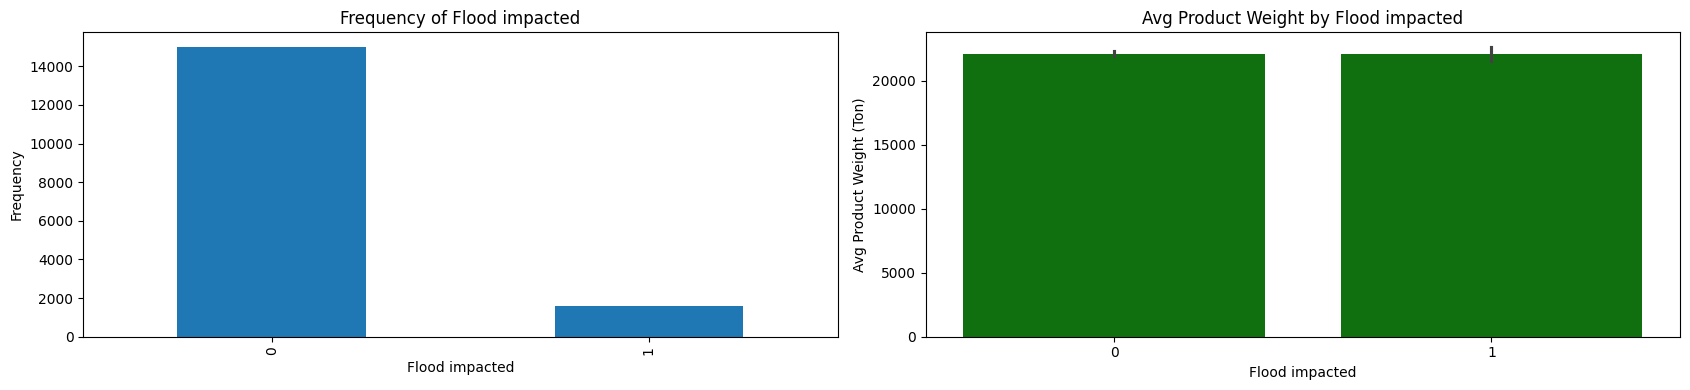

In [753]:
#bar chart showing Frequecy of Flood impacted warehouses and Average Product Weight by Flood impacted warehouses

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 4))

# Plotting the first bar chart
train_data['flood_impacted'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Flood impacted')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Flood impacted')

# Plotting the second bar chart
sns.barplot(data=train_data, x='flood_impacted', y='product_wg_ton', color='green')
axes[1].set_xlabel('Flood impacted')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Flood impacted')

plt.tight_layout()
plt.show()

# First chart shows that almost all of the warehouses were not impacted by flood
# Second chart shows that there is not much change in product weight according to whether the warehouses are flood impacted meaning that the variables arent correlated

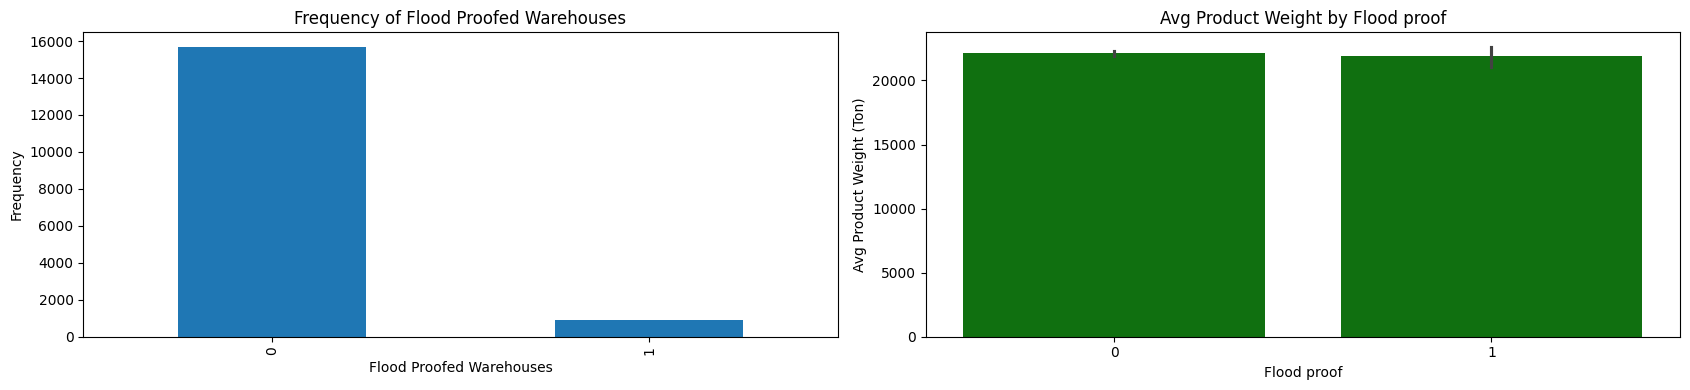

In [754]:
#bar chart showing Frequecy of Flood proofed warehouses and Average Product Weight by Flood proofed warehouses

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 4))

# Plotting the first bar chart
train_data['flood_proof'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Flood Proofed Warehouses')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Flood Proofed Warehouses')

# Plotting the second bar chart
sns.barplot(data=train_data, x='flood_proof', y='product_wg_ton', color='green')
axes[1].set_xlabel('Flood proof')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Flood proof')

plt.tight_layout()
plt.show()

# First chart shows that almost all of the warehouses are flood proofed
# Second chart shows that there is not much change in product weight according to whether the warehouses are flood proofed meaning that the variables arent correlated

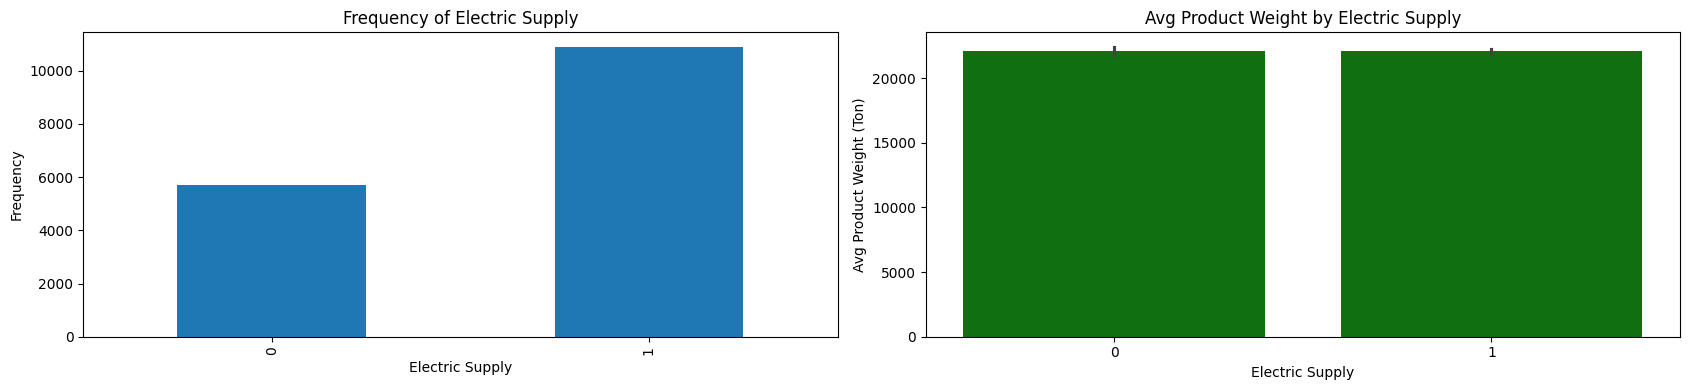

In [755]:
#bar chart showing Frequecy of Electric supply and Average Product Weight by Electric supply

# set up subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 4))

# Plotting the first bar chart
train_data['electric_supply'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Electric Supply')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Electric Supply')

# Plotting the second bar chart
sns.barplot(data=train_data, x='electric_supply', y='product_wg_ton', color='green')
axes[1].set_xlabel('Electric Supply')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Electric Supply')

plt.tight_layout()
plt.show()

# First chart shows that most of the warehouses have electric supply
# Second chart shows that there is not much change in product weight according to Electric supply meaning that the variables arent correlated

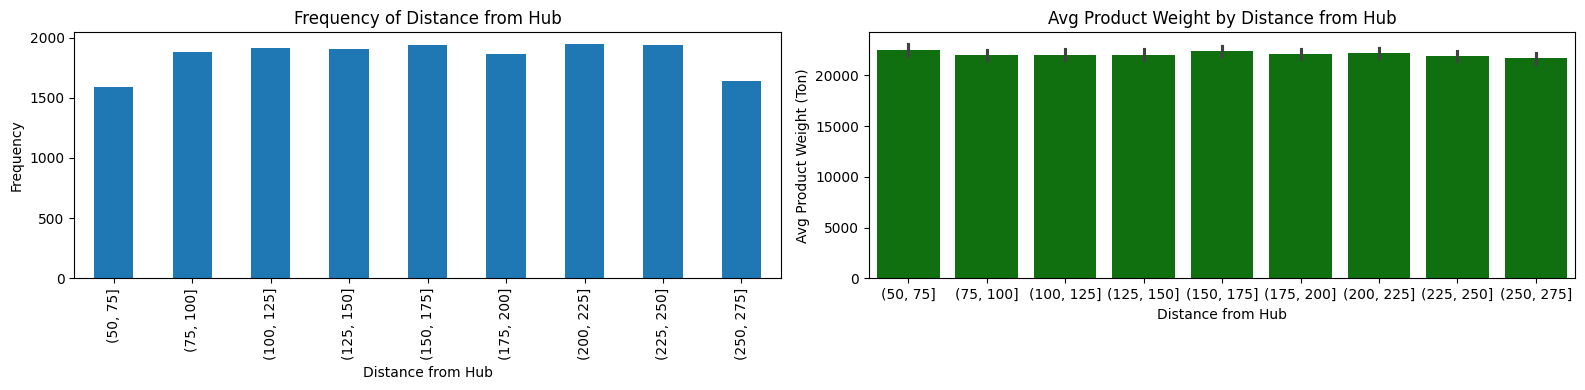

In [756]:
#bar chart showing Frequecy of Distance from Hub and Average Product Weight by Distance from Hub

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plotting the first bar chart
bins = [50,75, 100 ,125, 150, 175, 200, 225, 250, 275]  # Adjust the bin edges as per your data

# Created bins using pd.cut
train_data['binned_dist_from_hub'] = pd.cut(train_data['dist_from_hub'], bins=bins)

# Plot the histogram-like bar plot
train_data['binned_dist_from_hub'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Distance from Hub')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Distance from Hub')

# Plotting the second bar chart
sns.barplot(data=train_data, x='binned_dist_from_hub', y='product_wg_ton', color='green', ax=axes[1])
axes[1].set_xlabel('Distance from Hub')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Distance from Hub')

plt.tight_layout()
plt.show()

# First chart shows that Distance from Hub show not much variance in frequency
# Second chart shows that there is not much change in product weight according to the Distance from Hub meaning that the variables arent correlated

<ipython-input-757-91eb293bc613>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(sorted_workers_num, rotation=90)


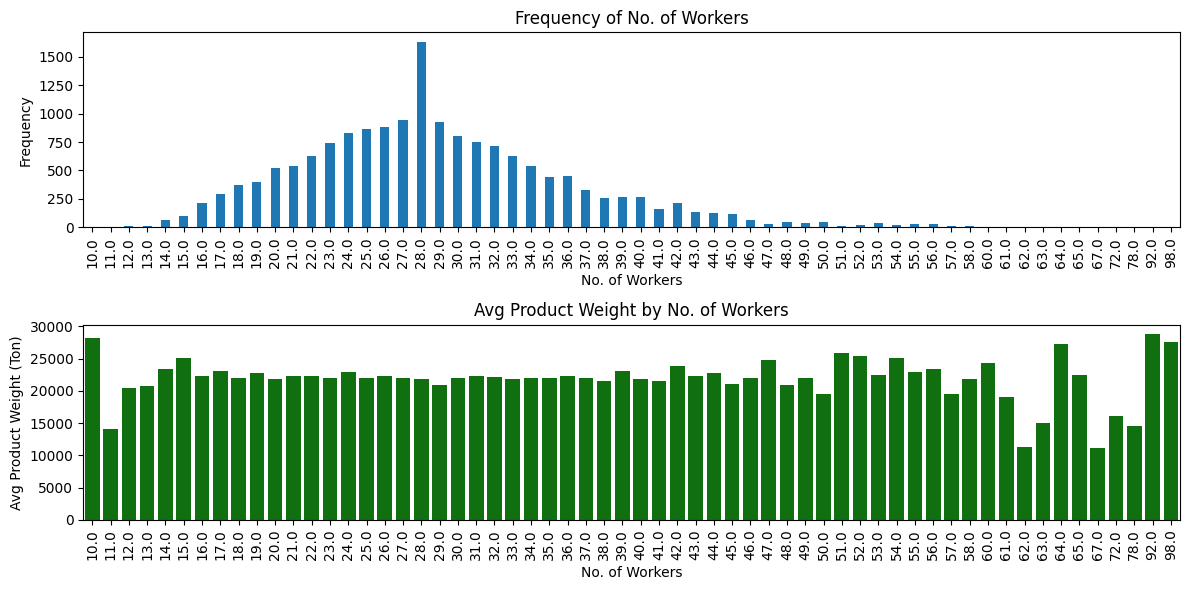

In [757]:
#bar chart showing Frequecy of No. of Workers and Average Product Weight by No. of Workers

# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plotting the first bar chart
train_data['workers_num'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('No. of Workers')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of No. of Workers')

# Plotting the second bar chart
sns.barplot(data=train_data, x='workers_num', y='product_wg_ton', color='green', errorbar=None)
axes[1].set_xlabel('No. of Workers')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by No. of Workers')
sorted_workers_num = sorted(train_data['workers_num'].unique())
axes[1].set_xticklabels(sorted_workers_num, rotation=90)

plt.tight_layout()
plt.show()

# First chart shows that frequency distribution is slightly positively skewed
# Second chart shows that there is not a big change in product weight according to the no.of workers meaning that the variables arent that correlated

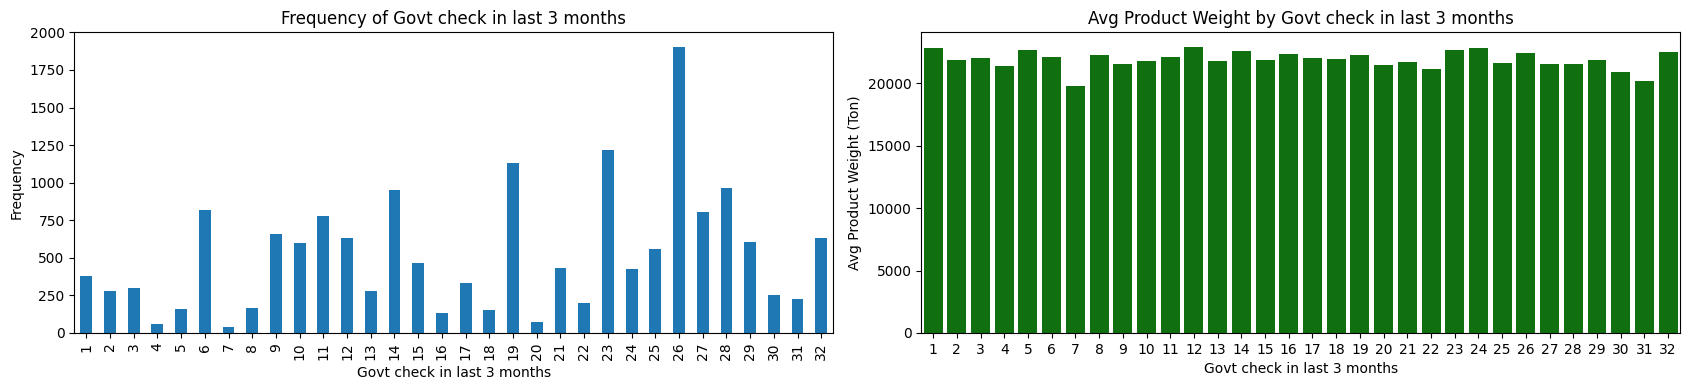

In [758]:
#bar chart showing Frequecy of Government check in last 3 months and Average Product Weight by Govt. check in last 3 months

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 4))

# Plotting the first bar chart
train_data['govt_check_l3m'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Govt check in last 3 months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Govt check in last 3 months')

# Plotting the second bar chart
sns.barplot(data=train_data, x='govt_check_l3m', y='product_wg_ton', color='green', errorbar=None)
axes[1].set_xlabel('Govt check in last 3 months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Govt check in last 3 months')

plt.tight_layout()
plt.show()

# Second chart shows that there is not much change in product weight according to Govt check in last 3 months meaning that the variables arent that correlated

In [759]:
# dropping columns made only for the sake of visualizing

train_data.drop('binned_retail_shop',axis=1,inplace=True)
train_data.drop('binned_dist_from_hub',axis=1,inplace=True)

## Data Transformation

In [760]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  object 
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [761]:
# selecting categorical and numerical features separately
train_cat_cols = train_data.select_dtypes(include='object').columns
train_num_cols = train_data.select_dtypes(include='number').columns
test_cat_cols = test_data.select_dtypes(include='object').columns
test_num_cols = test_data.select_dtypes(include='number').columns

In [762]:
# Label Encoding for categorical variables

for col in train_cat_cols:
    train_data[col] = LabelEncoder().fit_transform(train_data[col])

for col in test_cat_cols:
    test_data[col] = LabelEncoder().fit_transform(test_data[col])

In [763]:
# Standard Scaling for numerical variables

for col in train_num_cols:
  train_data[col] = StandardScaler().fit_transform(train_data[[col]])

for col in test_num_cols:
  test_data[col] = StandardScaler().fit_transform(test_data[[col]])

In [764]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  int64  
 4   num_refill_req_l3m            16620 non-null  float64
 5   transport_issue_l1y           16620 non-null  float64
 6   Competitor_in_mkt             16620 non-null  float64
 7   retail_shop_num               16620 non-null  float64
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  float64
 10  flood_impacted                16620 non-null  float64
 11  flood_proof                   16620 non-null  float64
 12  electric_supply               16620 non-null  float64
 13  d

In [765]:
train_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,-0.432304,0.181605,-0.961184,-0.316751,1,-1.148183,...,0.724604,-1.156662,0.016277,-0.684596,-0.450389,-0.664234,0,0.893603,-0.432430,-0.428866
1,0,0,1,4,-1.583422,-0.647365,0.781467,1.173258,0,0.281319,...,0.724604,0.741286,0.276527,-0.684596,-1.432533,-0.664234,0,-0.290836,-0.200401,-1.465098
2,0,1,2,1,-1.199716,-0.647365,0.781467,-0.645009,0,1.337908,...,-1.380065,-0.040222,1.057278,-0.684596,-0.013881,-0.664234,0,1.485823,0.379672,0.089379
3,0,1,1,2,1.102520,2.668518,-0.961184,0.966788,1,0.467776,...,-1.380065,-0.965272,-1.024723,-0.684596,-0.013881,1.505493,1,-0.290836,0.959746,0.001427
4,0,0,1,4,-0.432304,0.181605,-0.961184,-0.232069,0,-0.029442,...,0.724604,-0.821730,-0.504223,0.566267,0.095247,-0.664234,4,1.485823,0.611702,0.169757


In [766]:
test_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
16621,0,0,1,4,0.381233,-0.644738,-0.094096,0.580554,0,-1.699913,...,-1.384803,-0.126321,0.133493,-0.325353,0.751104,-0.652202,0,-0.868713,-1.593883,0.693850
16622,0,0,1,4,0.381233,-0.644738,-0.980389,0.834003,0,-0.133349,...,0.722125,-1.357552,0.263368,1.976132,-1.312831,1.533267,4,-0.868713,0.586029,-1.372071
16623,0,2,1,5,-0.386790,-0.644738,-0.094096,-0.169311,1,-0.133349,...,0.722125,-1.501462,1.562122,0.028722,0.207963,1.533267,1,0.895408,-1.134954,0.173784
16624,0,1,3,3,0.381233,1.039531,-0.980389,-0.187414,1,-1.699913,...,0.722125,1.456690,0.523119,1.622058,-0.878318,1.533267,1,-0.280673,-0.905490,-0.769478
16625,1,1,1,3,0.765245,-0.644738,0.792198,-1.221218,1,-1.135950,...,-1.384803,0.657190,-1.165261,-1.564614,0.859732,-0.652202,2,0.307368,0.815493,0.602736


In [767]:
#Selecting Independent (Features) & Dependent(Target) variables

X_train = train_data.drop(['product_wg_ton'], axis=1)
y_train = train_data['product_wg_ton']

X_test = test_data.drop(['product_wg_ton'], axis=1)
y_test = test_data['product_wg_ton']

In [768]:
#making sure shape is proper
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16620, 21)
(5529, 21)
(16620,)
(5529,)


<Axes: title={'center': 'Correlation with target'}>

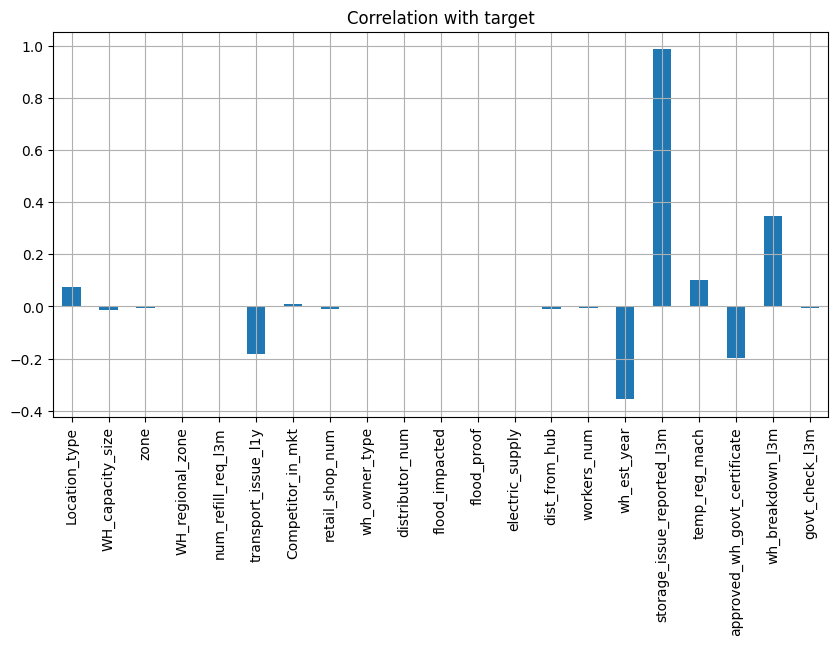

In [769]:
# Bar chart showing correlation of Target variables with all other independent varibales

train_data.drop('product_wg_ton', axis=1).corrwith(train_data.product_wg_ton).plot(kind='bar', grid=True, figsize=(10, 5),
                                                   title="Correlation with target")

# from the graph we can conclude that storage_issue_reported_l3m, temp_reg_mach,  wh_breakdown_l3m  and Location_type are positively correlated to the target variable
# while transport issues in last one year,  Warehouse established year and approved_wh_govt_certificate are negatively correlated to the target variable


# Linear Regression

In [770]:
# creating the model

mlr = LinearRegression()

# feeding the training data to the model

mlr.fit(X_train, y_train)

# predicting the test set results

lr_y_pred = mlr.predict(X_test)

# calculating the mean squared error
lr_MAE = metrics.mean_absolute_error(y_test, lr_y_pred)

# Calculating the root mean squared error
lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))

# Calculating the r2 score
lr_r2score = metrics.r2_score(y_test, lr_y_pred)

print('Mean Absolute Error:', lr_MAE)
print('Root Mean Square Error:', lr_RMSE)
print('R2 score:', lr_r2score)

Mean Absolute Error: 0.11185633015396727
Root Mean Square Error: 0.15044248650023542
R2 score: 0.9773670582556265


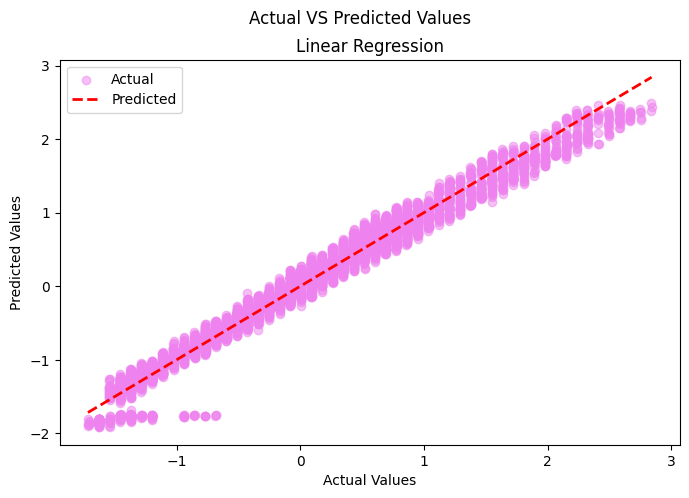

In [771]:
# Chart showing Actual VS Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_y_pred, color='violet', alpha=0.5, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.suptitle('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#Decision Tree

In [772]:
# creating the model

model = DecisionTreeRegressor(random_state = 0)

# feeding the training data to the model

model.fit(X_train, y_train)

# predicting the test set results

dt_y_pred = model.predict(X_test)

# calculating the mean squared error
dt_MAE = metrics.mean_absolute_error(y_test, dt_y_pred)

# Calculating the root mean squared error
dt_RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred))

# Calculating the r2 score
dt_r2score = metrics.r2_score(y_test, dt_y_pred)

print('Mean Absolute Error:', dt_MAE)
print('Root Mean Square Error:', dt_RMSE)
print('R2 score:', dt_r2score)

Mean Absolute Error: 0.07305223123578099
Root Mean Square Error: 0.10700669921148583
R2 score: 0.9885495663238626


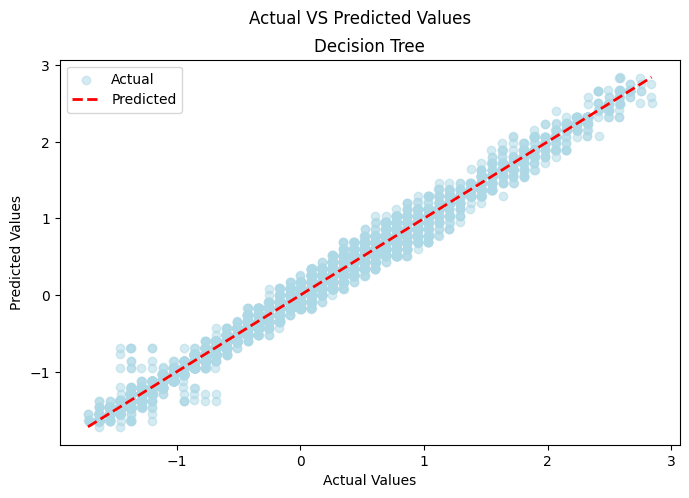

In [773]:
# Chart showing Actual VS Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, dt_y_pred, color='lightblue', alpha=0.5, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted')
plt.title('Decision Tree')
plt.suptitle('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Random Forest

In [774]:
# creating the model

model = RandomForestRegressor(n_estimators = 100, max_depth = 4, n_jobs = -1)

# feeding the training data to the model

model.fit(X_train, y_train)

# predicting the test set results

rf_y_pred = model.predict(X_test)

# calculating the mean squared error
rf_MAE = metrics.mean_absolute_error(y_test, rf_y_pred)

# Calculating the root mean squared error
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))

# Calculating the r2 score
rf_r2score = metrics.r2_score(y_test, rf_y_pred)

print('Mean Absolute Error:', rf_MAE)
print('Root Mean Square Error:', rf_RMSE)
print('R2 score:', rf_r2score)

Mean Absolute Error: 0.10732034304251888
Root Mean Square Error: 0.14088124334894664
R2 score: 0.9801524752724549


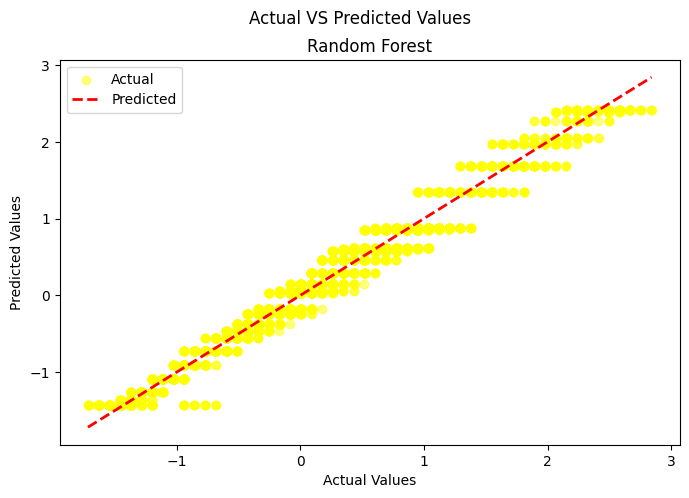

In [775]:
# Chart showing Actual VS Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_y_pred, color='yellow', alpha=0.5, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted')
plt.title('Random Forest')
plt.suptitle('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Gradient Boosting Regressor



In [776]:
#creating the model
model = GradientBoostingRegressor()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
gbr_y_pred = model.predict(X_test)

# calculating the mean squared error
gbr_MAE = metrics.mean_absolute_error(y_test, gbr_y_pred)

# Calculating the root mean squared error
gbr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, gbr_y_pred))

# Calculating the r2 score
gbr_r2score = metrics.r2_score(y_test, gbr_y_pred)

print('Mean Absolute Error:', gbr_MAE)
print('Root Mean Square Error:', gbr_RMSE)
print('R2 score:', gbr_r2score)

Mean Absolute Error: 0.058168162659873124
Root Mean Square Error: 0.07616726250408845
R2 score: 0.9941985481226333


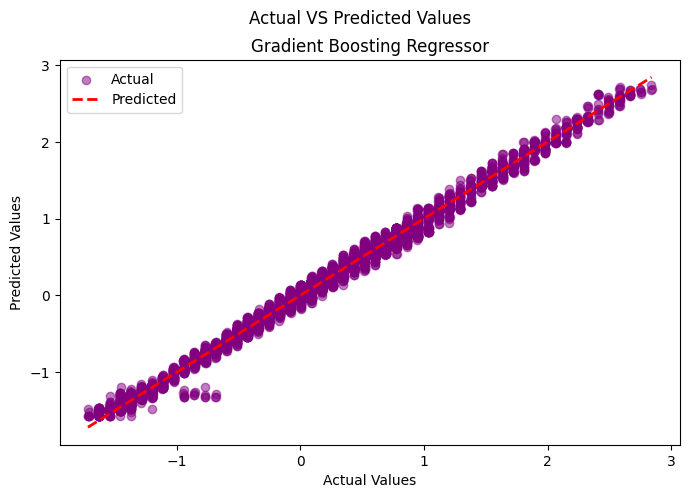

In [777]:
# Chart showing Actual VS Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, gbr_y_pred, color='purple', alpha=0.5, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted')
plt.title('Gradient Boosting Regressor')
plt.suptitle('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# XGBoost (Extreme Gradient Boosting)

In [778]:
#creating the model
model = XGBRegressor()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
xg_y_pred = model.predict(X_test)

# calculating the mean squared error
xg_MAE = metrics.mean_absolute_error(y_test, xg_y_pred)

# Calculating the root mean squared error
xg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, xg_y_pred))

# Calculating the r2 score
xg_r2score = metrics.r2_score(y_test, xg_y_pred)

print('Mean Absolute Error:', xg_MAE)
print('Root Mean Square Error:', xg_RMSE)
print('R2 score:', xg_r2score)

Mean Absolute Error: 0.06746873579287217
Root Mean Square Error: 0.09189229566606746
R2 score: 0.99155580599722


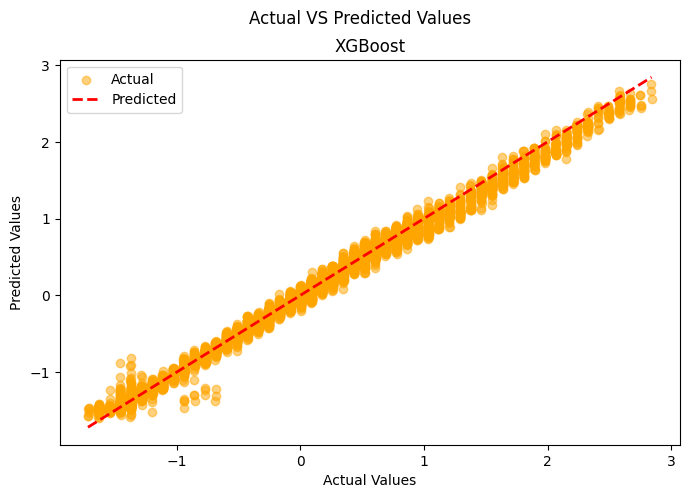

In [779]:
# Chart showing Actual VS Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, xg_y_pred, color='orange', alpha=0.5, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted')
plt.title('XGBoost')
plt.suptitle('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Support Vector Machine

In [780]:

# Creating the model
svm_regressor = SVR(kernel='linear', C=1.0)

# Training the model
svm_regressor.fit(X_train, y_train)

#predicting the test set results
svm_y_pred = svm_regressor.predict(X_test)

# calculating the mean squared error
svm_MAE = metrics.mean_absolute_error(y_test, svm_y_pred)

# Calculating the root mean squared error
svm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))

# Calculating the r2 score
svm_r2score = metrics.r2_score(y_test, svm_y_pred)

print('Mean Absolute Error:', svm_MAE)
print('Root Mean Square Error:', svm_RMSE)
print('R2 score:', svm_r2score)

Mean Absolute Error: 0.10908543764719543
Root Mean Square Error: 0.15148317417353055
R2 score: 0.9770528479423118


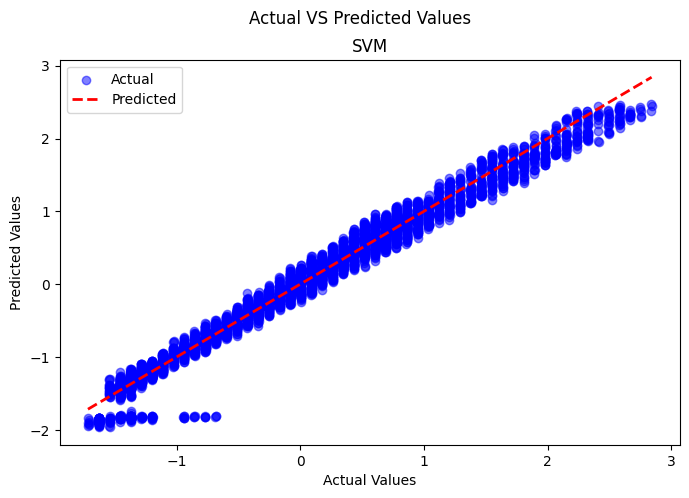

In [781]:
# Chart showing Actual VS Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, svm_y_pred, color='blue', alpha=0.5, label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted')
plt.title('SVM')
plt.suptitle('Actual VS Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Results

In [782]:
# displaying results for comparing and selecting the best model

result = pd.DataFrame({'Model':('Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Regressor', 'XGBoost', 'SVM'),
                       'R2 Score': (lr_r2score, dt_r2score, rf_r2score, gbr_r2score, xg_r2score, svm_r2score),
                      'Mean Absolute Error': (lr_MAE, dt_MAE, rf_MAE, gbr_MAE, xg_MAE, svm_MAE),
                       'Root Mean Squared Error': (lr_RMSE, dt_RMSE, rf_RMSE, gbr_RMSE, xg_RMSE, svm_RMSE)}, index=[1,2,3,4,5,6])
display(result)

,Model,R2 Score,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.977367,0.111856,0.150442
2,Decision Tree,0.988550,0.073052,0.107007
3,Random Forest,0.980152,0.107320,0.140881
4,Gradient Boosting Regressor,0.994199,0.058168,0.076167
5,XGBoost,0.991556,0.067469,0.091892
6,SVM,0.977053,0.109085,0.151483


# Conclusion

All of the Machine Learning models have R2 Score above 0.97 which is considered very high and suggests that the model is a good fit for the data.

## **Gradient Boosting Regressor** with the highest R2 Score at 0.994199, lowest Mean Absolute Error at 0.058168 and lowest Root Mean Squared Error at 0.076167 is the best model.